In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from math import sqrt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

import warnings
warnings.filterwarnings('ignore')

# 1. Load the tips dataset from either `pydataset` or `seaborn`.

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 2. Fit a OLS model and compute yhat, predictions of tip using total_bill.
Ordinary Least Squares Linear Regression Model

In [3]:
# creating DataFrame for X (features) and Series for y (target)
X = pd.DataFrame(tips.total_bill)
y = tips.tip

# concatenating y Series to X DataFrame
tips_ready = pd.concat([X, y], axis = 1)

In [4]:
# creating Ordinary Least Squares (OLS) Linear Regression model object and fitting model to data
ols = LinearRegression().fit(X, y)

#making y_hat predictions
y_hat_pred = ols.predict(X)

# creating new predictions column
tips_ready['y_hat'] = y_hat_pred

# preview df
tips_ready.head()

,total_bill,tip,y_hat
0,16.99,1.01,2.704636
1,10.34,1.66,2.006223
2,21.01,3.50,3.126835
3,23.68,3.31,3.407250
4,24.59,3.61,3.502822


In [5]:
# creating baseline column
tips_ready['baseline'] = tips_ready.tip.mean()
tips_ready.head()

,total_bill,tip,y_hat,baseline
0,16.99,1.01,2.704636,2.998279
1,10.34,1.66,2.006223,2.998279
2,21.01,3.50,3.126835,2.998279
3,23.68,3.31,3.407250,2.998279
4,24.59,3.61,3.502822,2.998279


# 3. Plot the residuals for the linear regression model that you made.

In [6]:
# calculating residual and adding column to DataFrame
tips_ready['residual'] = tips_ready.tip - tips_ready.y_hat

In [7]:
# preview to check added
tips_ready.head()

,total_bill,tip,y_hat,baseline,residual
0,16.99,1.01,2.704636,2.998279,-1.694636
1,10.34,1.66,2.006223,2.998279,-0.346223
2,21.01,3.50,3.126835,2.998279,0.373165
3,23.68,3.31,3.407250,2.998279,-0.097250
4,24.59,3.61,3.502822,2.998279,0.107178


Text(0.5, 1.0, 'OLS Model Residuals')

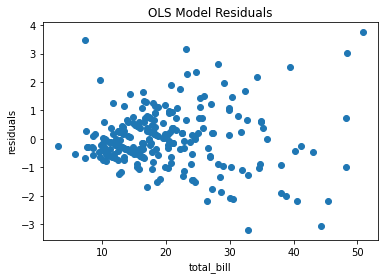

In [14]:
# plotting model residuals against x (total_bill)
plt.scatter(tips_ready.total_bill, tips_ready.residual)
plt.xlabel('total_bill')
plt.ylabel('residuals')
plt.title('OLS Model Residuals')

# 3. Calculate:
>- the sum of squared errors, <br>
>explained sum of squares, <br>
>total sum of squares, <br>
>- mean squared error, and <br>
>- root mean squared error 

### for your model.

In [9]:
# calculating sum of squared errors | SEE
sse = (tips_ready.residual**2).sum()
print('Model SSE =', '{:.1f}'.format(sse))

Model SSE = 252.8


In [10]:
# calculating mean squared error | MSE
mse = sse / len(tips_ready)
print('Model MSE =', '{:.3f}'.format(mse))

Model MSE = 1.036


In [11]:
# calculating root mean squared error | RMSE
rmse = sqrt(mse)
print('Model RMSE =', '{:.3f}'.format(rmse))

Model RMSE = 1.018
